### Access to Earth Dashboard datasets
#### Following this [spreadsheet](https://docs.google.com/spreadsheets/d/1EkKgllw0QIhSpV2J153ujtYdnKpJfGMS1cKcJJyO8O8/edit#gid=0), locate datasets ids and prepare querys when possible

In [1]:
import json
import requests
from pprint import pprint
import getpass
import LMIPy as lmi
import matplotlib.pyplot as plt
%matplotlib inline

**Get RW API token**

In [2]:
def get_token(email):
    api_url = 'http://api.resourcewatch.org'
    password = getpass.getpass('Resource Watch login password:')

    payload = {
        "email": f"{email}",
        "password": f"{password}"
    }

    url = f'{api_url}/auth/login'

    headers = {'Content-Type': 'application/json'}

    r = requests.post(url, data=json.dumps(payload), headers=headers)
    
    return r.json().get('data').get('token')

In [4]:
#token = get_token(email='iker.sanchez@vizzuality.com')
token = get_token(email='tamara.huete@vizzuality.com')

Resource Watch login password: ········


### 1. Climate
#### 1A. Rising temperatures

In [6]:
# Global temperature
d = lmi.Dataset('917f1945-fff9-4b6f-8290-4f4b9417079e')
d

Dataset 917f1945-fff9-4b6f-8290-4f4b9417079e Dash_cli.044.nrt Global Land Temperature

In [19]:
t =lmi.Table('917f1945-fff9-4b6f-8290-4f4b9417079e')

In [20]:
t.head()

https://api.resourcewatch.org/v1/query/917f1945-fff9-4b6f-8290-4f4b9417079e?sql=SELECT%20*%20FROM%20cli_044_global_land_temperature%20LIMIT%205


,cartodb_id,the_geom,the_geom_webmercator,date,no_smoothing,lowess_5_smoothing
0,141,None,None,1880-12-31T00:00:00Z,-0.16,-0.08
1,142,None,None,1881-12-31T00:00:00Z,-0.07,-0.12
2,143,None,None,1882-12-31T00:00:00Z,-0.10,-0.16
3,144,None,None,1883-12-31T00:00:00Z,-0.16,-0.19
4,145,None,None,1884-12-31T00:00:00Z,-0.27,-0.23


In [21]:
# QUERIES
w = lmi.Widget('c8a973d1-7600-4950-aded-9ef74cfe3080')
w.attributes['widgetConfig']['data'][0]['url']

'https://api.resourcewatch.org/v1/query/917f1945-fff9-4b6f-8290-4f4b9417079e?sql=SELECT%20date%20as%20x%2C%20no_smoothing%20as%20y%20FROM%20cli_044_global_land_temperature%20%20%20ORDER%20BY%20date%20desc LIMIT 500&env=production&application=rw&hash=20047'

In [22]:
sql = f"""
        SELECT
            date as x,
            no_smoothing as y
        FROM data
        ORDER BY date asc
        LIMIT 500
"""

results = t.query(sql=sql)
#results

https://api.resourcewatch.org/v1/query/917f1945-fff9-4b6f-8290-4f4b9417079e?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20date%20as%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20no_smoothing%20as%20y%0A%20%20%20%20%20%20%20%20FROM%20cli_044_global_land_temperature%0A%20%20%20%20%20%20%20%20ORDER%20BY%20date%20asc%0A%20%20%20%20%20%20%20%20LIMIT%20500%0A


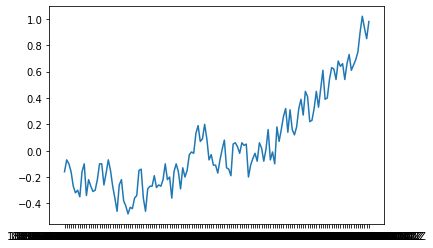

In [23]:
plt.plot(results.x,results.y)

In [26]:
results.to_csv('../../../../../Earth_Dashboard/temperature_rise.csv')

#### 1B. Atmospheric CO2 rise

In [12]:
t =lmi.Table('d287c201-4d7b-4b41-b352-edfcc6f96cb0')
t.head()

https://api.resourcewatch.org/v1/query/d287c201-4d7b-4b41-b352-edfcc6f96cb0?sql=SELECT%20*%20FROM%20cli_045_carbon_dioxide_concentration%20LIMIT%205


,cartodb_id,the_geom,the_geom_webmercator,index,date,average,interpolated,season_adjusted_trend,num_days
0,1,None,None,1958,315-09-13 12:00:00,314.43,-1,-9.99,-0.99
1,2,None,None,1958,317-06-14 06:00:00,315.16,-1,-9.99,-0.99
2,3,None,None,1958,317-07-06 03:36:00,314.71,-1,-9.99,-0.99
3,4,None,None,1958,317-03-29 14:24:00,315.14,-1,-9.99,-0.99
4,5,None,None,1958,315-11-10 21:36:00,315.18,-1,-9.99,-0.99


In [13]:
w = lmi.Widget('aa9fbe32-1f4d-416c-8f07-e8adf72f26ed')
# reach the query
w.attributes['widgetConfig']['data'][0]['url']

'https://api.resourcewatch.org/v1/query/d287c201-4d7b-4b41-b352-edfcc6f96cb0?sql=SELECT%20date%20as%20x%2C%20average%20as%20y%20FROM%20cli_045_carbon_dioxide_concentration%20WHERE%20average%20%3E%3D%200%20AND%20average%20%3C%3D%20410%20AND%20average%20IS%20NOT%20NULL%20%20ORDER%20BY%20date%20desc LIMIT 750&hash=31782'

In [14]:
# reproduce query
sql = f"""
        SELECT
            date as x,
            average as y
        FROM data
        WHERE average >= 0
        AND average <= 410
        AND average IS NOT NULL
        ORDER BY date asc
        LIMIT 750&hash=5280
"""

results = t.query(sql=sql)
#results

https://api.resourcewatch.org/v1/query/d287c201-4d7b-4b41-b352-edfcc6f96cb0?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20date%20as%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20average%20as%20y%0A%20%20%20%20%20%20%20%20FROM%20cli_045_carbon_dioxide_concentration%0A%20%20%20%20%20%20%20%20WHERE%20average%20%3E=%200%0A%20%20%20%20%20%20%20%20AND%20average%20%3C=%20410%0A%20%20%20%20%20%20%20%20AND%20average%20IS%20NOT%20NULL%0A%20%20%20%20%20%20%20%20ORDER%20BY%20date%20asc%0A%20%20%20%20%20%20%20%20LIMIT%20750&hash=5280%0A


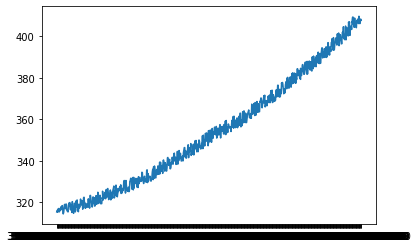

In [15]:
plt.plot(results.x,results.y)

#### 1C. Artic Sea Ice Decrease
*** GEE SQL query, problem extracting dates ***

In [4]:
t =lmi.Table('a99c5cf5-f141-4bed-a36d-b04c8e171dfa')

In [38]:
t.head()

https://api.resourcewatch.org/v1/query/a99c5cf5-f141-4bed-a36d-b04c8e171dfa?sql=SELECT%20*%20FROM%20projects/resource-watch-gee/cli_005_historical_sea_ice_extent/cli_005_arctic_sea_ice_extent_reproj_month09_hist%20LIMIT%205


,system:asset_size,system:footprint,system:index,system:time_end,system:time_start
0,10232,"{'coordinates': [[-180.0, -90.0], [180.0, -90....",cli_005_arctic_sea_ice_197909,3.049920e+11,3.049920e+11
1,10184,"{'coordinates': [[-180.0, -90.0], [180.0, -90....",cli_005_arctic_sea_ice_198009,3.366144e+11,3.366144e+11
2,10248,"{'coordinates': [[-180.0, -90.0], [180.0, -90....",cli_005_arctic_sea_ice_198109,3.681504e+11,3.681504e+11
3,10263,"{'coordinates': [[-180.0, -90.0], [180.0, -90....",cli_005_arctic_sea_ice_198209,3.996864e+11,3.996864e+11
4,10350,"{'coordinates': [[-180.0, -90.0], [180.0, -90....",cli_005_arctic_sea_ice_198309,4.312224e+11,4.312224e+11


In [143]:
t.attributes['provider'] ### it a GEE dataset

'gee'

In [7]:
# reproduce query
sql = f"""
        SELECT
            system:index AS x,          
            system:asset_size AS y
        FROM data
        ORDER BY date asc
        LIMIT 750&hash=5280
"""
### get dates
results = t.query(sql=sql)
#results

# Tried modifying the date column to get something more understandable but failed probably beacuse of the GEEE to SQL conversion https://vizzuality.github.io/sql2gee/
#REGEXP_MATCHES(system:index,'[0-9]{{{4}}}') as y   
##SUBSTRING(system:index,20,24) as y

https://api.resourcewatch.org/v1/query/a99c5cf5-f141-4bed-a36d-b04c8e171dfa?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20system:index%20AS%20x,%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20system:asset_size%20AS%20y%0A%20%20%20%20%20%20%20%20FROM%20projects/resource-watch-gee/cli_005_historical_sea_ice_extent/cli_005_arctic_sea_ice_extent_reproj_month09_hist%0A%20%20%20%20%20%20%20%20ORDER%20BY%20date%20asc%0A%20%20%20%20%20%20%20%20LIMIT%20750&hash=5280%0A


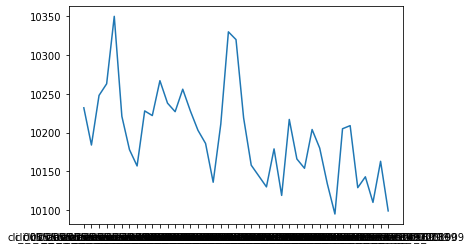

In [8]:
plt.plot(results.x,results.y)

#### 1D. Sources of Green House gas emissions

In [3]:
w = lmi.Widget('c62cb2d4-2b42-437e-9724-02c1e795f0e1')
# reach the query
w.attributes['widgetConfig']['data'][0]['url']

"https://wri-rw.carto.com/api/v2/sql?q=SELECT datetime as x, yr_data AS y, sector AS c FROM cli_049_pik_world_sectoral_ar4 WHERE sector NOT ILIKE 'Total including LULUCF' ORDER BY c ASC, x ASC&hash=54137"

In [26]:
w.attributes['dataset']

'ab61b2df-4487-461d-b96f-d371027c6f67'

In [27]:
t = lmi.Table('ab61b2df-4487-461d-b96f-d371027c6f67')
t.head()

https://api.resourcewatch.org/v1/query/ab61b2df-4487-461d-b96f-d371027c6f67?sql=SELECT%20*%20FROM%20cli_049_pik_world_sectoral_ar4%20LIMIT%205


,cartodb_id,the_geom,the_geom_webmercator,country,source,sector,gas,gwp,datetime,yr_data
0,1,None,None,WORLD,PIK,Total including LULUCF,All GHG,AR4,1850-01-01T00:00:00Z,2870.00
1,2,None,None,WORLD,PIK,Energy,All GHG,AR4,1850-01-01T00:00:00Z,258.00
2,3,None,None,WORLD,PIK,Industrial process,All GHG,AR4,1850-01-01T00:00:00Z,9.35
3,4,None,None,WORLD,PIK,Solvent sector,All GHG,AR4,1850-01-01T00:00:00Z,1.84
4,5,None,None,WORLD,PIK,Agriculture,All GHG,AR4,1850-01-01T00:00:00Z,598.00


In [71]:
# reproduce query
sql = f"""
        SELECT
            TO_CHAR(datetime,'YYYY') AS x,
            yr_data as y,    
            sector as c 
        FROM data
        WHERE sector NOT ILIKE 'Total including LULUCF'
        ORDER BY
            c ASC,
            x ASC
       
"""
### get dates
results = t.query(sql=sql)
#results
# split_part(datetime, '-', 1) as x,   

https://api.resourcewatch.org/v1/query/ab61b2df-4487-461d-b96f-d371027c6f67?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20TO_CHAR(datetime,'YYYY')%20AS%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20yr_data%20as%20y,%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20sector%20as%20c%20%0A%20%20%20%20%20%20%20%20FROM%20cli_049_pik_world_sectoral_ar4%0A%20%20%20%20%20%20%20%20WHERE%20sector%20NOT%20ILIKE%20'Total%20including%20LULUCF'%0A%20%20%20%20%20%20%20%20ORDER%20BY%0A%20%20%20%20%20%20%20%20%20%20%20%20c%20ASC,%0A%20%20%20%20%20%20%20%20%20%20%20%20x%20ASC%0A%20%20%20%20%20%20%20%0A


In [72]:
results.head() 

,x,y,c
0,1850,598.0,Agriculture
1,1851,617.0,Agriculture
2,1852,637.0,Agriculture
3,1853,656.0,Agriculture
4,1854,675.0,Agriculture


In [92]:
pivoted = results.pivot(index='x', columns='c', values='y').reset_index()
pivoted.head()
#pivoted.columns

c,x,Agriculture,Energy,Industrial process,Land-Use Change and Forestry,Other,Solvent sector,Waste
0,1850,598.0,258.0,9.35,1920.0,7.04,1.84,80.2
1,1851,617.0,260.0,11.20,1890.0,7.23,1.88,80.9
2,1852,637.0,270.0,12.20,2100.0,7.41,1.94,81.6
3,1853,656.0,280.0,13.60,2100.0,7.58,2.01,82.2
4,1854,675.0,319.0,15.10,2090.0,7.74,2.16,83.0


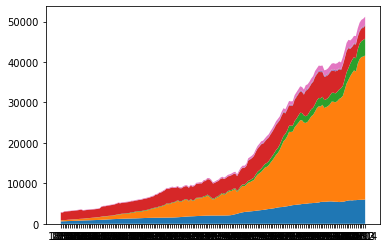

In [107]:
plt.stackplot(pivoted['x'],pivoted['Agriculture '],pivoted['Energy'],pivoted['Industrial process'], 
              pivoted['Land-Use Change and Forestry '],pivoted['Other'],pivoted['Solvent sector'],pivoted['Waste '])

### 2. Forests
#### 2A. Tree cover loss (Main Custom made)
*** updating table in process ***

In [ ]:
d= lmi.Dataset('6a27e704-92ba-4817-a1ed-bfcdb27f9de3')
#d

#### 2B. Treecover loss map (MAP)

In [ ]:
d= lmi.Dataset('6a27e704-92ba-4817-a1ed-bfcdb27f9de3')
#d

#### 2C. Fires (MAP)

In [ ]:
d= lmi.Dataset('64c948a6-5e34-4ef2-bb69-6a6535967bd5')
#d.head()

#### 2D. Endangered species critical habitats (MAP)

In [ ]:
d= lmi.Dataset('5b5a21ac-0835-43fb-86b9-64b93d472e10')
#d.head()

#### 2E. Land use by Food type

In [10]:
t= lmi.Table('702f4bcb-c376-49b6-9345-cdc8aa989582')
#t.head()

In [11]:
# reproduce query
### it has to be a stacked bar chart...What variables?
sql = f"""
        SELECT
            food_type as x,          
            total_land_use_ha_per_million_kilocalories_consumed as y    
        FROM data
        ORDER BY y DESC
"""
### get dates
results = t.query(sql=sql)
#results


https://api.resourcewatch.org/v1/query/702f4bcb-c376-49b6-9345-cdc8aa989582?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20food_type%20as%20x,%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20total_land_use_ha_per_million_kilocalories_consumed%20as%20y%20%20%20%20%0A%20%20%20%20%20%20%20%20FROM%20foo_046b_food_footprint_calories_wrrupdate%0A%20%20%20%20%20%20%20%20ORDER%20BY%20y%20DESC%0A


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

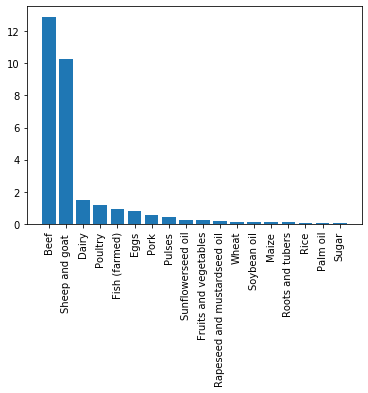

In [12]:
plt.bar(results.x,results.y)
plt.xticks(rotation=90)

### 3. Water
#### 3A. Water stress (main custom made)

In [4]:
d= lmi.Dataset('c66d7f3a-d1a8-488f-af8b-302b0f2c3840')
#d.head()

#### 3B. Levels of water stress around the world (MAP)

In [ ]:
d= lmi.Dataset('c66d7f3a-d1a8-488f-af8b-302b0f2c3840')
#d.head()

#### 3C. Access to clean water (Bar Chart by country)

In [15]:
t= lmi.Table('e32bdaba-5a72-487c-b640-668adaea2976')
t.head()

https://api.resourcewatch.org/v1/query/e32bdaba-5a72-487c-b640-668adaea2976?sql=SELECT%20*%20FROM%20wat_005a_improved_water_access_edit%20LIMIT%205


,cartodb_id,the_geom,the_geom_webmercator,country_code,country_name,datetime,year,total,unit1,indicator_code1,urban,unit2,indicator_code2,rural,unit3,indicator_code3,rw_country_name,rw_country_code
0,174721,None,None,AFG,Afghanistan,2019-01-01T00:00:00Z,2019,None,% of population,SH.H2O.SMDW.ZS,None,% of urban pop,SH.H2O.SMDW.UR.ZS,None,% of rural pop,SH.H2O.SMDW.RU.ZS,Afghanistan,AFG
1,174722,None,None,AFG,Afghanistan,2018-01-01T00:00:00Z,2018,None,% of population,SH.H2O.SMDW.ZS,None,% of urban pop,SH.H2O.SMDW.UR.ZS,None,% of rural pop,SH.H2O.SMDW.RU.ZS,Afghanistan,AFG
2,174723,None,None,AFG,Afghanistan,2017-01-01T00:00:00Z,2017,None,% of population,SH.H2O.SMDW.ZS,None,% of urban pop,SH.H2O.SMDW.UR.ZS,None,% of rural pop,SH.H2O.SMDW.RU.ZS,Afghanistan,AFG
3,174724,None,None,AFG,Afghanistan,2016-01-01T00:00:00Z,2016,None,% of population,SH.H2O.SMDW.ZS,None,% of urban pop,SH.H2O.SMDW.UR.ZS,None,% of rural pop,SH.H2O.SMDW.RU.ZS,Afghanistan,AFG
4,174725,None,None,AFG,Afghanistan,2015-01-01T00:00:00Z,2015,None,% of population,SH.H2O.SMDW.ZS,None,% of urban pop,SH.H2O.SMDW.UR.ZS,None,% of rural pop,SH.H2O.SMDW.RU.ZS,Afghanistan,AFG


In [21]:
# reproduce query
sql = f"""
        SELECT
            country_name as x,
            total as y,
        FROM data
        WHERE total >= 4 AND total <= 101 AND total IS NOT NULL AND year = 2012
        ORDER BY total asc LIMIT 50

"""

results = t.query(sql=sql)
#results

https://api.resourcewatch.org/v1/query/e32bdaba-5a72-487c-b640-668adaea2976?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20country_name%20as%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20total%20as%20y,%0A%20%20%20%20%20%20%20%20FROM%20wat_005a_improved_water_access_edit%0A%20%20%20%20%20%20%20%20WHERE%20total%20%3E=%204%20AND%20total%20%3C=%20101%20AND%20total%20IS%20NOT%20NULL%20AND%20year%20=%202012%0A%20%20%20%20%20%20%20%20ORDER%20BY%20total%20asc%20LIMIT%2050%0A%0A


In [26]:
# reproduce query
sql = f"""
        SELECT
            country_name as x,
            total as y
        FROM data
        WHERE total >= 4 AND total <= 101 AND total IS NOT NULL AND year = 2012
        ORDER BY total asc LIMIT 50

"""

results = t.query(sql=sql)
#results

https://api.resourcewatch.org/v1/query/e32bdaba-5a72-487c-b640-668adaea2976?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20country_name%20as%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20total%20as%20y%0A%20%20%20%20%20%20%20%20FROM%20wat_005a_improved_water_access_edit%0A%20%20%20%20%20%20%20%20WHERE%20total%20%3E=%204%20AND%20total%20%3C=%20101%20AND%20total%20IS%20NOT%20NULL%20AND%20year%20=%202012%0A%20%20%20%20%20%20%20%20ORDER%20BY%20total%20asc%20LIMIT%2050%0A%0A


In [ ]:
results

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

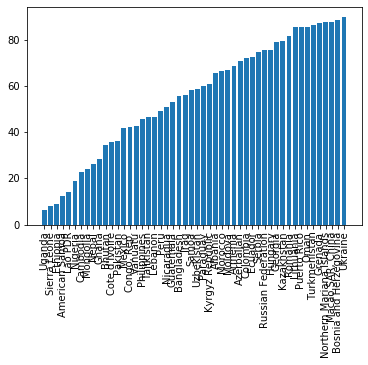

In [29]:
plt.bar(results.x,results.y)
plt.xticks(rotation=90)

#### 3D. Global Water surface change (Map)

In [ ]:
d= lmi.Dataset('6f058503-7384-4a54-b4b5-b1046c84ba21')
#d

#### 3E. Ground water declining (Map)

In [30]:
d= lmi.Dataset('a6d63d85-dc1e-4dba-8df0-c888590f94fb')
#d

### 4. Oceans
#### 4A. Main: Ocean Health Index

In [31]:
d= lmi.Dataset('d0b93d79-3391-4590-b4a6-fb741678a746')

#### 4B. Mismanaged Plastic Waste (Widget not defined yet)

In [39]:
#Plastics
d= lmi.Dataset('38e1bdc7-a843-40b8-ac86-2e47ccd896e4')
t= lmi.Table('38e1bdc7-a843-40b8-ac86-2e47ccd896e4')

In [47]:
# reproduce query
# mpw = mismanaged plastic in kg/year
# area = catchment area m2
sql = f"""
        SELECT
            area as x,
            mpw as y
        FROM data
        
"""

results = t.query(sql=sql)
results

https://api.resourcewatch.org/v1/query/38e1bdc7-a843-40b8-ac86-2e47ccd896e4?sql=%0A%20%20%20%20%20%20%20%20SELECT%0A%20%20%20%20%20%20%20%20%20%20%20%20area%20as%20x,%0A%20%20%20%20%20%20%20%20%20%20%20%20mpw%20as%20y%0A%20%20%20%20%20%20%20%20FROM%20wat_063_plasticriverinputs%0A%20%20%20%20%20%20%20%20%0A


,x,y
0,22500000,21753.300
1,95100000,506114.000
2,33500000,56294.600
3,99200000,349409.000
4,39700000,199000.000
...,...,...
40755,34500000,13.095
40756,27800000,26.555
40757,26700000,18.163
40758,16000000,10.763


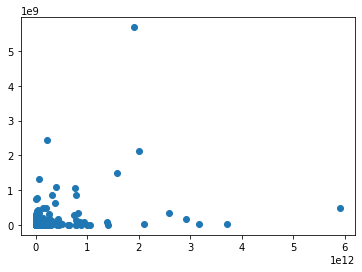

In [49]:
plt.scatter(results.x,results.y)

#### 4C. Marine protected areas (Filtered to Marine) (Widget not defined yet)

In [ ]:
#MPAs
d= lmi.Dataset('2442891a-157a-40e6-9092-ee596e6d30ba')
#d

#### 4D. Annual Fishing by Year (Widget not defined yet)

In [32]:
# Annual Fishing by Year
d= lmi.Dataset('cce60f5e-6e3b-4bad-a568-a6613c512c47')
#d